# Analisi testuale dei discorsi del presidente dal 1949 ad oggi


In [14]:
# Anzitutto le librerie
import pandas as pd
import os

In [32]:
# Leggo l'elenco di tutti i discorsi suddivisi per anno
elenco_discorsi = pd.read_csv('elenco_discorsi.csv', encoding='utf-8')

# Nel 1948 non ci fu nessun discorso da parte di Enrico De Nicola. Pertanto tolgo la riga
elenco_discorsi = elenco_discorsi[elenco_discorsi['URL'] != 'NAP']

# Lunghezza dei discorsi
Come primo esercizio diamo un'occhiata al numero di parole dei discorsi di fine anno cercando di identificare un trend e vedere quali sono le differenti attitudini dei singoli Presidenti

In [36]:
# Primo passo: leggiamo i discorsi
contenuti_discorsi = []
percorso_discorsi = 'discorsi/'

for anno in elenco_discorsi['Anno']:
    # il path per aprire ciascun singolo file
    nome_file = f"{anno}.txt"
    percorso_file = os.path.join(percorso_discorsi, nome_file)
    
    # inseiriamo il discorso nella lista contenuti_discorsi
    if os.path.exists(percorso_file):
        with open(percorso_file, 'r', encoding='utf-8') as file:
            contenuti_discorsi.append(file.read())
    else:
        # Se il file non esiste
        contenuti_discorsi.append("File non trovato")

# Inserico il testo direttamente nel dataframe "elenco_discorsi" nella colonna Discorso
elenco_discorsi['Discorso'] = contenuti_discorsi

In [37]:
# Funzione per calcolare il numero di parole in un testo
def conta_parole(test):
    return len(test.split())

# Applicare la funzione e creo la colonna 'Discorso'
elenco_discorsi['Numero_parole'] = elenco_discorsi['Discorso'].apply(conta_parole)

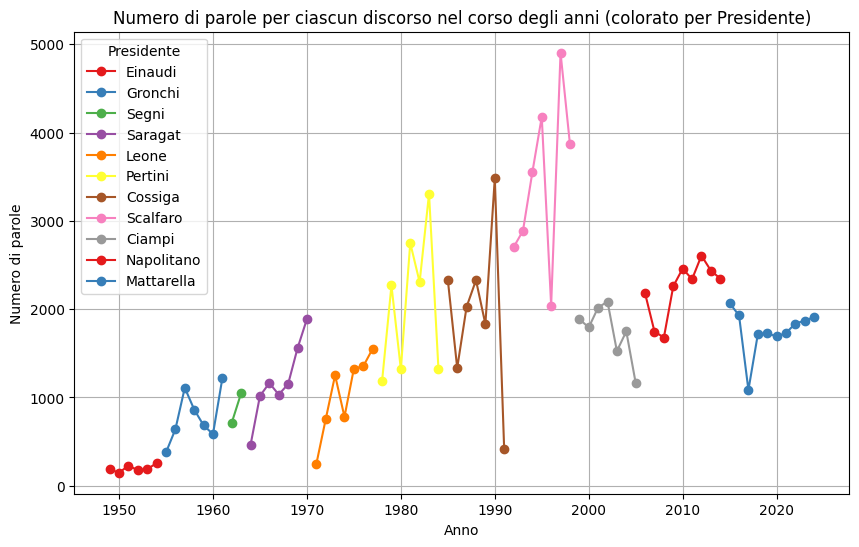

In [11]:
# Visualizziamo il trend temporale del numero di parole per ciascun discorso
# Usiamo la libreria seaborn per colorare i grafici in base al presidente

import seaborn as sns

# Creare una lista di colori distinti (per ogni presidente)
presidenti_unici = elenco_discorsi['Cognome'].unique()
colori_presidenti = sns.color_palette("Set1", len(presidenti_unici))

# Creare un dizionario che mappa il cognome del presidente a un colore
mappa_colori = {presidente: colore for presidente, colore in zip(presidenti_unici, colori_presidenti)}

# Creare un grafico per ciascun presidente
plt.figure(figsize=(10, 6))

for presidente in presidenti_unici:
    # Filtriamo il DataFrame per ciascun presidente
    df_presidente = elenco_discorsi[elenco_discorsi['Cognome'] == presidente]
    
    # Tracciare la linea per questo presidente
    plt.plot(df_presidente['Anno'], df_presidente['Numero_parole'], marker='o', label=presidente, color=mappa_colori[presidente])

# Aggiungere etichette, titolo, e la legenda
plt.title('Numero di parole per ciascun discorso nel corso degli anni (colorato per Presidente)')
plt.xlabel('Anno')
plt.ylabel('Numero di parole')
plt.legend(title='Presidente', loc='upper left')
plt.grid(True)

# Mostrare il grafico
plt.show()


In [23]:
# Creiamo qui un grafico interattivo con Plotly

import plotly.express as px

# Creare una mappa di colori per ciascun presidente
presidenti_unici = elenco_discorsi['Cognome'].unique()

# Conversione RGB in codici esadecimali
colori_presidenti = {presidente: '#%02x%02x%02x' % tuple(int(c * 255) for c in color)
                      for presidente, color in zip(presidenti_unici, sns.color_palette("Set1", len(presidenti_unici)))}

# Aggiungere il colore al DataFrame basato sul Presidente in formato esadecimale
elenco_discorsi['Colore_presidente'] = elenco_discorsi['Cognome'].map(colori_presidenti)

# Grafico interattivo con Plotly
fig = px.line(elenco_discorsi, x='Anno', y='Numero_parole', color='Cognome',
              title='Discorsi di fine anno del Presidente della Repubblica - numero di parole',
              labels={'Numero_parole': 'Numero di parole', 'Anno': 'Anno'},
              color_discrete_map=colori_presidenti)  # Use color_discrete_map
fig.show()

In [26]:
# Salvo il grafico come file HTML per pubblicarlo su infigures. Può essere utilizzato per condividere il grafico interattivo con altri
fig.write_html("dfa_num_parole.html")